In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy

df = pd.read_csv(r'C:\Users\rahul manuwas\Desktop\train.csv', header = 0)
copy1 = copy.deepcopy(df)
plt.close("all")
#Raw data
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [203]:
#Replace all the missing values in the Age column with meadian of age in df
df["Age"] = df["Age"].fillna(df["Age"].median())

# Replace all the occurences of male with the number 0 and female with 1.
df.loc[df["Sex"] == "male", "Sex"] = 0
df.loc[df["Sex"] == "female", "Sex"] = 1

#Replace all the missing values in the fare column with meadian of fare in df
df["Fare"] = df["Fare"].fillna(df["Fare"].median())

# Replace all the occurences of S with 0, C with 1, Q with 2 in Embarked
df.loc[df["Embarked"] == "S", "Embarked"] = 0
df.loc[df["Embarked"] == "C", "Embarked"] = 1
df.loc[df["Embarked"] == "Q", "Embarked"] = 2

titanic = copy.deepcopy(df)
titanic.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",0,33.0,0,0,349257,7.8958,NaN,0
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",1,22.0,0,0,7552,10.5167,NaN,0
883,884,0,2,"Banfield, Mr. Frederick James",0,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,0
884,885,0,3,"Sutehall, Mr. Henry Jr",0,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,NaN,2
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,NaN,0
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1
890,891,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.7500,NaN,2


In [204]:
# Create bins for fare
df['bin_categories']= np.floor(df['Fare']/10)
df[df['bin_categories']>3] = 3
df= df[['bin_categories', 'Survived']]

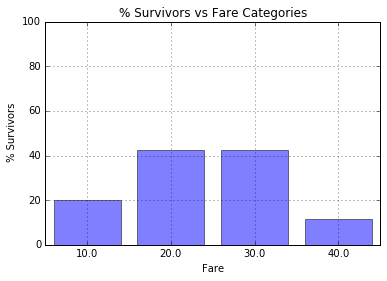

In [205]:
# Count survivors % and plot against bin
%matplotlib inline 
df2 = pd.DataFrame({'count_total' : df.groupby(['bin_categories']).count()['Survived'], 'count_number': df[df['Survived']==1].groupby( [ "bin_categories"] ).count()['Survived']}).reset_index()

axes = plt.axes()
axes.set_ylim([0,100])
axes.grid()

df2['Survived%']=(df2['count_number']/df2['count_total'])*100
df2['bin_categories'] = (df2['bin_categories']+1)*10

objects = df2['bin_categories'].values
y_pos = np.arange(len(objects))
performance = df2['Survived%'].values

plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel(' % Survivors')
plt.xlabel('Fare')
plt.title('% Survivors vs Fare Categories')
plt.savefig(r'C:\Users\rahul manuwas\Desktop\Figures\Fig1.png', format = 'png')
plt.show()


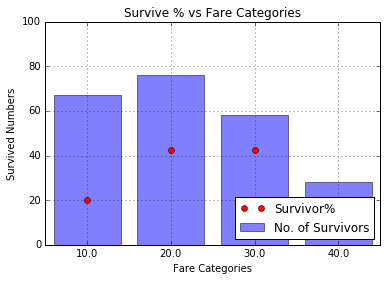

In [206]:
# Calculate number of survivor and plot against bin 
axes = plt.axes()
axes.set_ylim([0,100])
axes.grid()

objects = df2['bin_categories'].values
y_pos = np.arange(len(objects))
survived = df2['count_number'].values
percent_survived = df2['Survived%'].values


plt.bar(y_pos, survived, align='center', alpha=0.5)
plt.plot(y_pos, percent_survived, 'ro')
plt.xticks(y_pos, objects)
plt.xlabel('Fare Categories')
plt.ylabel('Survived Numbers')
plt.title('Survive % vs Fare Categories')
plt.legend(['Survivor%', 'No. of Survivors'], loc=4)

plt.savefig(r'C:\Users\rahul manuwas\Desktop\Figures\Fig2.png', format = 'png')
plt.show()

In [208]:
# Create bins for age
df = copy.deepcopy(titanic)
df['age_bin']= np.floor(df['Age']/10)
df[df['age_bin']>3] = 3
df= df[['age_bin', 'Survived']]

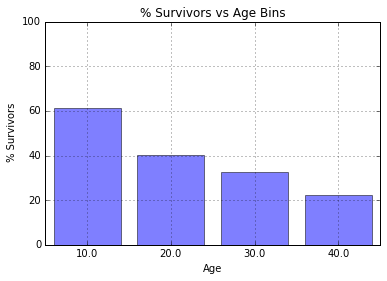

In [209]:
# Count age and plot against bin
%matplotlib inline 
df3 = pd.DataFrame({'count_total' : df.groupby(['age_bin']).count()['Survived'], 'count_number': df[df['Survived']==1].groupby( [ "age_bin"] ).count()['Survived']}).reset_index()

axes = plt.axes()
axes.set_ylim([0,100])
axes.grid()

df3['Survived%']=(df3['count_number']/df3['count_total'])*100
df3['age_bin'] = (df3['age_bin']+1)*10

objects = df3['age_bin'].values
y_pos = np.arange(len(objects))
performance = df3['Survived%'].values

plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel(' % Survivors')
plt.xlabel('Age')
plt.title('% Survivors vs Age Bins')

plt.savefig(r'C:\Users\rahul manuwas\Desktop\Figures\Fig3.png', format = 'png')

plt.show()

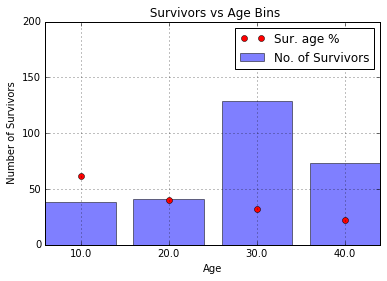

In [210]:
# Count age and plot against bin
%matplotlib inline 
df3 = pd.DataFrame({'count_total' : df.groupby(['age_bin']).count()['Survived'], 'count_number': df[df['Survived']==1].groupby( [ "age_bin"] ).count()['Survived']}).reset_index()

axes = plt.axes()
axes.set_ylim([0,200])
axes.grid()

df3['Survived']=(df3['count_number'])
df3['age_bin'] = (df3['age_bin']+1)*10

df3['Survived%']=(df3['count_number']/df3['count_total'])*100
percentsurvived_byage = df3['Survived%']

objects = df3['age_bin'].values
y_pos = np.arange(len(objects))
performance = df3['Survived'].values

plt.bar(y_pos, performance, align='center', alpha=0.5)

plt.xticks(y_pos, objects)
plt.ylabel(' Number of Survivors')
plt.xlabel('Age')
plt.title(' Survivors vs Age Bins')
plt.plot(y_pos, percentsurvived_byage, 'ro') #plot percent survived by age within the graph

plt.legend(['Sur. age %', 'No. of Survivors'], loc=1)
plt.savefig(r'C:\Users\rahul manuwas\Desktop\Figures\Fig4.png', format = 'png')
plt.show()

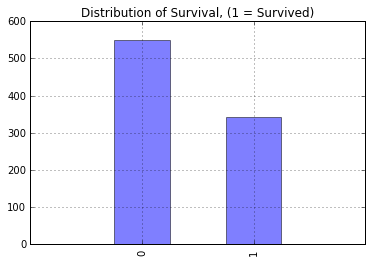

In [211]:
#Plot of number of survivers 
df = copy.deepcopy(titanic)
df.head(5)
df.Survived.value_counts().plot(kind='bar', alpha=0.5)
axes = plt.axes()
axes.set_ylim([0,600])
axes.grid()
axes.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")    
plt.savefig(r'C:\Users\rahul manuwas\Desktop\Figures\Fig5.png', format = 'png')
plt.show()

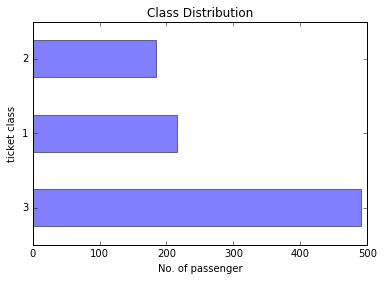

In [214]:
axes = plt.axes()
axes.grid()
df.Pclass.value_counts().plot(kind="barh", alpha=0.5)
plt.title("Class Distribution")
plt.xlabel("No. of passenger")
plt.ylabel("ticket class")
plt.savefig(r'C:\Users\rahul manuwas\Desktop\Figures\Fig6.png', format = 'png')

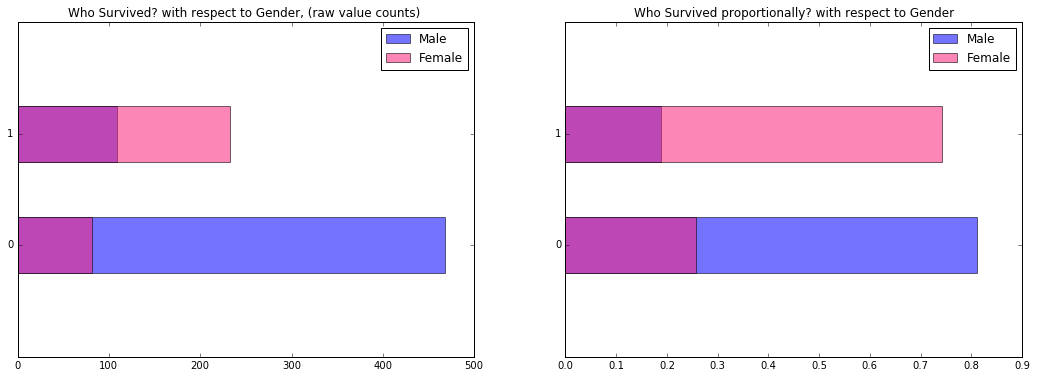

In [219]:
df = copy1

fig = plt.figure(figsize=(18,6))

#create a plot of two subsets, male and female, of the survived variable.
#After we do that we call value_counts() so it can be easily plotted as a bar graph. 
#'barh' is just a horizontal bar graph
df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()

ax1 = fig.add_subplot(121)
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) "); plt.legend(loc='best')
ax1.set_ylim(-1, 2)


#adjust graph to display the proportions of survival by gender
ax2 = fig.add_subplot(122)
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')

ax2.set_ylim(-1, 2)

plt.savefig(r'C:\Users\rahul manuwas\Desktop\Figures\Fig7.png', format = 'png')
